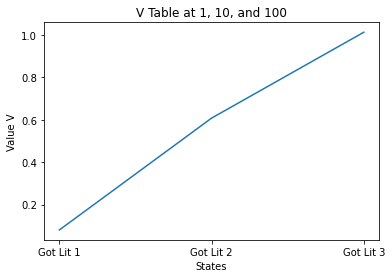

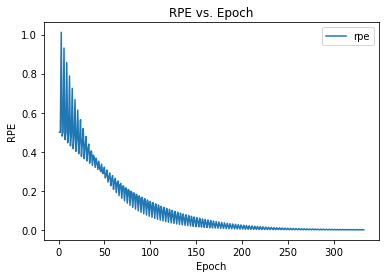

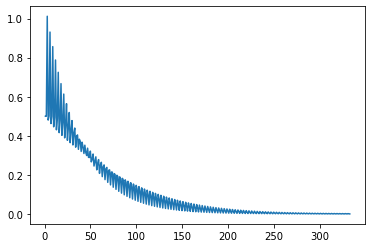

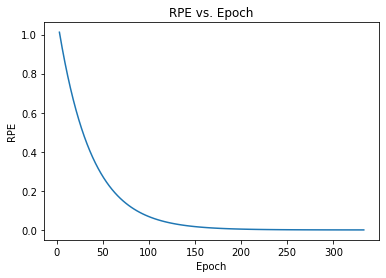

     epoch       rpe
2        3  1.012000
5        6  0.931040
8        9  0.856557
11      12  0.788032
14      15  0.724990
..     ...       ...
320    321  0.040000
323    324  0.040000
326    327  0.040000
329    330  0.040000
332    333  0.040000

[111 rows x 2 columns]


/Users/mariya/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


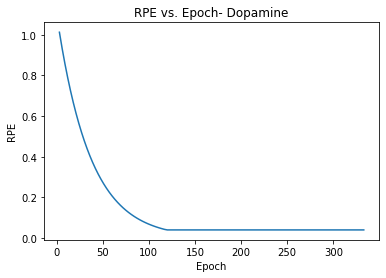

333
333


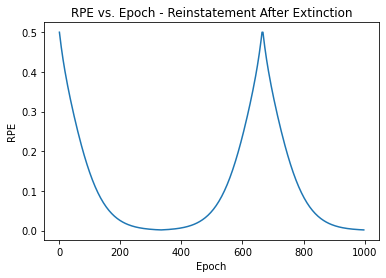

In [15]:
import matplotlib.pyplot as plt 
import pandas as pd

index = [] #x-coordinate
rpe_values = []

class Enviroment: # Creats the class Enviroment
    
    STATE_TRANSITIONS = {"Cue" : "Wait", 
                         "Wait" : "Got Lit", 
                         "Got Lit" : None}
    
    #Links each state with the state that follows
    
    REWARD_TRANSITIONS = {"Cue" : 0, 
                         "Wait" : 0, 
                         "Got Lit" : 1,
                         None :0}
    
    #Links each state with its associated reward
    
    def __init__(self):
        self.state = "Cue"
        #Begin in state self (cue)
    
    def transition(self):
        state = self.state #Current state
        new_state = Enviroment.STATE_TRANSITIONS[state]
        new_reward = Enviroment.REWARD_TRANSITIONS[new_state]
        self.state = new_state #Updates current state
        return (new_state, new_reward) #New state and new reward defined

class TDAgent():
    def __init__(self, gamma=0.8, alpha=0.08, eta=0.05): #Random Values for g and a
        
        self.V = {"Cue" : 0,
                  "Wait" : 0,
                  "Got Lit" : 0,
                  None : 0}
        
        #initializes V table as zero since number of states so small
        
        self.gamma = gamma
        self.alpha = alpha
        self.eta = eta
        
        # This method implements TD-learning
        
    
    def TD_learn(self, state1, reward1, state2, prev_rpe):
        
        V1 = self.V[state1]
        V2 = self.V[state2]
        g = self.gamma
        a = self.alpha
        h = self.eta
        
        # Calculate RPE and new estimate of V1
        # update it with each rpe
        
        
        rpe = g**3 * (reward1 + V2) + 1 - (V1 + (h * prev_rpe)) #this is where delta p goes
        V1 = V1 + (a * rpe)
        
        # Update the internal value of V1
        self.V[state1] = V1
        
        TDAgent.variable = rpe
        rpe_values.append(rpe)
        prev_rpe = rpe
        
        
def rl_loop(environment, agent): #loops the enviro and agent
    prev_rpe = 10
    while environment.state is not None:
        state = environment.state
        reward = environment.REWARD_TRANSITIONS[state]
        
        # This is the moment in which we learn
        transition = environment.transition()
        new_state = None
        if transition is not None:
            new_state = transition[0]
        
        agent.TD_learn(state, reward, new_state, prev_rpe)

        
def run_trials(environment, agent, n):
    #runs n amount of trials 
    for j in range(n):
        environment.state = "Cue"
        rl_loop(environment, agent) 
        
e = Enviroment()
a = TDAgent()

run_trials(e, a, 1)
lit1 = a.V["Got Lit"]

run_trials(e, a, 10)
lit2 = a.V["Got Lit"]

run_trials(e, a, 100)
lit3 = a.V["Got Lit"]

x = ["Got Lit 1","Got Lit 2","Got Lit 3"] 
y = [lit1,lit2,lit3]  
plt.plot(x, y) 
plt.xlabel('States') 
plt.ylabel('Value V') 
plt.title('V Table at 1, 10, and 100') 

plt.show() 

for i in range (1,334):
    index.append(i)

#print(len(rpe_values))
#print(index)

rpe_df = pd.DataFrame()
rpe_df["epoch"] = index
rpe_df["rpe"] = rpe_values


rpe_df_3 = rpe_df[rpe_df.epoch % 3 == 0]

#plt.plot(x=rpe_df.epoch, y=rpe_df.rpe)
ax = plt.gca()
rpe_df.plot(kind="line", x="epoch", y="rpe", ax=ax)
plt.xlabel("Epoch")
plt.ylabel("RPE")
plt.title("RPE vs. Epoch")
plt.show()

plt.plot(index, rpe_values)
plt.show()


x1=rpe_df_3.epoch
y1=rpe_df_3.rpe
plt.plot(x1,y1)
plt.xlabel("Epoch")
plt.ylabel("RPE")
plt.title("RPE vs. Epoch")
plt.show()
plt.show()


#threshold_df = rpe_df_3.loc[(rpe_df_3.epoch <= 0.04),'epoch']=0

#hresho3.loc[rpe_df_3['rpe' <= 0.04]] = 0

# rpec[(df.Event == 'Dance'),'Event']='Hip-Hop'

baseline = 0.04
rpe_df_3.loc[(rpe_df_3.rpe <= baseline),'rpe']=baseline
print(rpe_df_3)

#pe_df_3.loc[rpe_df_3['rpe'] <= 0.04] =0.04
# print(rpe_df_3)

x2=rpe_df_3.epoch
y2=rpe_df_3.rpe
plt.plot(x2,y2)
plt.xlabel("Epoch")
plt.ylabel("RPE")
plt.title("RPE vs. Epoch- Dopamine")
plt.show()

rpe_values_3 = rpe_values[::3]
epoch_values_3 = index[::3]

rpe_values_3_shift = rpe_values[::3]
epoch_values_3_shift = index[::3]

# for i in index:
#     if i % 3 == 0:
#         epoch_values_3.append(i)

        

# for i in rpe_values:
#     if i % 3 == 0:
#         rpe_values_3.append(i)
    
    
#rint(len(rpe_values_3))
#for i in reversed(epoch_values_3):
   # epoch_values_3.append(i)

#for i in epoch_values_3:
   # epoch_values_3_shift.append(epoch_values_3)


for i in epoch_values_3:
    epoch_values_3_shift.append(i + 333)
    
for i in epoch_values_3:
    epoch_values_3_shift.append(i + 666)
    
# so now the x values should go from 1 to 999 every 3rd x value


for i in reversed(rpe_values_3):
    rpe_values_3_shift.append(i)
for i in (rpe_values_3):
    rpe_values_3_shift.append(i)

print(len(rpe_values_3_shift))
print(len(epoch_values_3_shift))

x3=epoch_values_3_shift
y3=rpe_values_3_shift

plt.plot(x3,y3)
plt.xlabel("Epoch")
plt.ylabel("RPE")
plt.title("RPE vs. Epoch - Reinstatement After Extinction")
plt.show()